In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

##### Load data

In [47]:
df = pd.read_csv(r'.\202401-bluebikes-tripdata.csv')
print("For the month of January 2024, there are {} rides.".format(df.shape[0]))

For the month of January 2024, there are 166699 rides.


##### Select trips that have either start or end stations in Cambridge

In [48]:
# Function to check if the station ID starts with M
def check_station_id(station_id):
    if isinstance(station_id, str) and station_id.startswith('M'):
        return True
    return False

# Filter rows based on the criteria for start_station_id or end_station_id
cambridge_df = df[df.apply(lambda row: check_station_id(row['start_station_id']) or check_station_id(row['end_station_id']), axis=1)].copy()
print("Out of these, {} rides were from or to a station in Cambridge.".format(cambridge_df.shape[0]))
cambridge_df.head(5)

Out of these, 81439 rides were from or to a station in Cambridge.


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,D2F4A4783B230A84,electric_bike,2024-01-31 12:16:49,2024-01-31 12:21:02,Ames St at Main St,M32037,Central Square at Mass Ave / Essex St,M32011,42.362357,-71.088163,42.365070,-71.103100,member
1,D305CEFFD4558633,classic_bike,2024-01-12 08:14:16,2024-01-12 08:19:48,Ames St at Main St,M32037,Central Square at Mass Ave / Essex St,M32011,42.362500,-71.088220,42.365070,-71.103100,member
2,02009BB4EBA0D1F6,electric_bike,2024-01-29 15:00:05,2024-01-29 15:05:47,One Memorial Drive,M32053,Kennedy-Longfellow School 158 Spring St,M32065,42.361697,-71.080273,42.369553,-71.085790,member
3,04C230C1C39071F7,classic_bike,2024-01-09 16:33:40,2024-01-09 17:00:41,Ames St at Main St,M32037,Brookline Town Hall,K32005,42.362500,-71.088220,42.333765,-71.120464,member
6,F93AF0484FBA82B2,classic_bike,2024-01-23 12:50:25,2024-01-23 12:55:28,Ames St at Main St,M32037,Kennedy-Longfellow School 158 Spring St,M32065,42.362500,-71.088220,42.369553,-71.085790,member


##### Remove trips that start and end at the same station

In [49]:
cambridge_df = cambridge_df[cambridge_df['start_station_id'] != cambridge_df['end_station_id']]
cambridge_df.shape

(79785, 13)

##### Length of trips

In [50]:
# Convert the 'started_at' and 'ended_at' columns to datetime format
cambridge_df['started_at'] = pd.to_datetime(cambridge_df['started_at'])
cambridge_df['ended_at'] = pd.to_datetime(cambridge_df['ended_at'])

# Calculate the duration of each trip in minutes
cambridge_df['duration_minutes'] = (cambridge_df['ended_at'] - cambridge_df['started_at']).dt.total_seconds() / 60

# Remove any negative or zero durations, if they exist
cambridge_df = cambridge_df[cambridge_df['duration_minutes'] > 0]

# check how many rides were below half an hour, up to 2 hours, up to 8 hours and more than 8 hours.
bins = [0, 30, 60, 120, 480, 1440, 100000]
binned_data = pd.cut(cambridge_df['duration_minutes'], bins)
hist_as_series = binned_data.value_counts(sort = False).to_numpy()
print("{} trips between 0 and 30 minutes\n {} trips between 30 and 60 minutes\n {} trips between 1 and 2 hours\n {} trips between 2 and 8 hours\n {} trips longer than 8 hours".format(hist_as_series[0], hist_as_series[1], hist_as_series[2], hist_as_series[3], hist_as_series[4]))

76412 trips between 0 and 30 minutes
 2709 trips between 30 and 60 minutes
 309 trips between 1 and 2 hours
 185 trips between 2 and 8 hours
 105 trips longer than 8 hours


##### Trips by day of the month

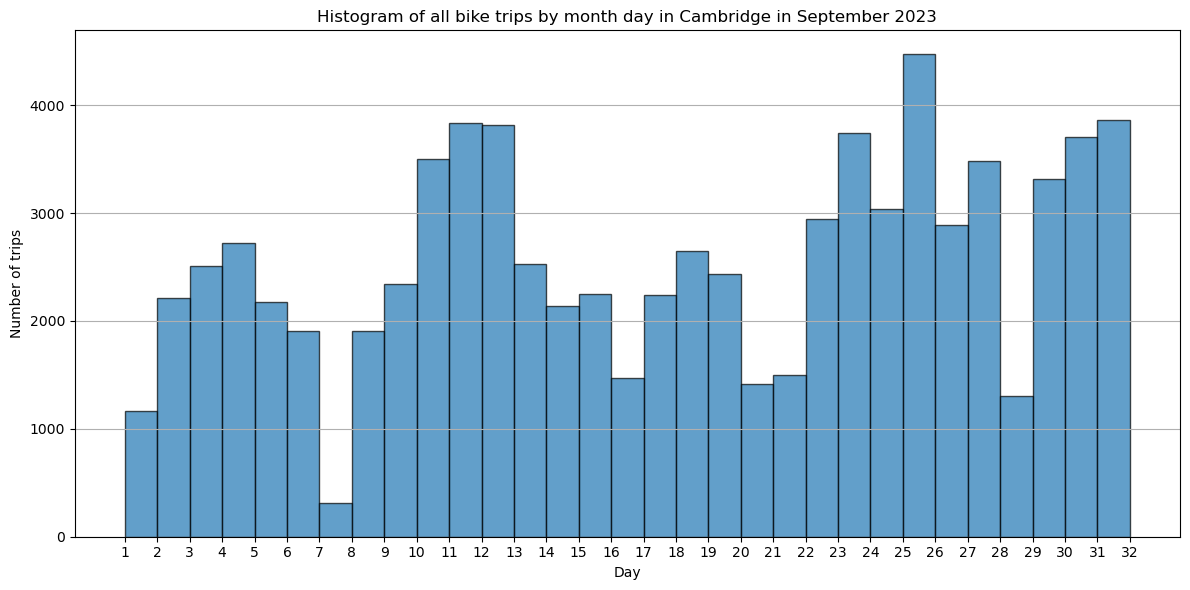

In [51]:
# Extract the day from the "started_at" column
cambridge_df['start_day'] = pd.to_datetime(cambridge_df['started_at']).dt.day

# Plot a histogram
plt.figure(figsize=(12, 6))
plt.hist(cambridge_df['start_day'], bins=range(1,33), edgecolor='black', alpha=0.7)
plt.title('Histogram of all bike trips by month day in Cambridge in September 2023')
plt.xlabel('Day')
plt.ylabel('Number of trips')
plt.xticks(range(1,33))
plt.grid(axis='y')
plt.tight_layout()

plt.show()

##### Filter rides that are on the same day

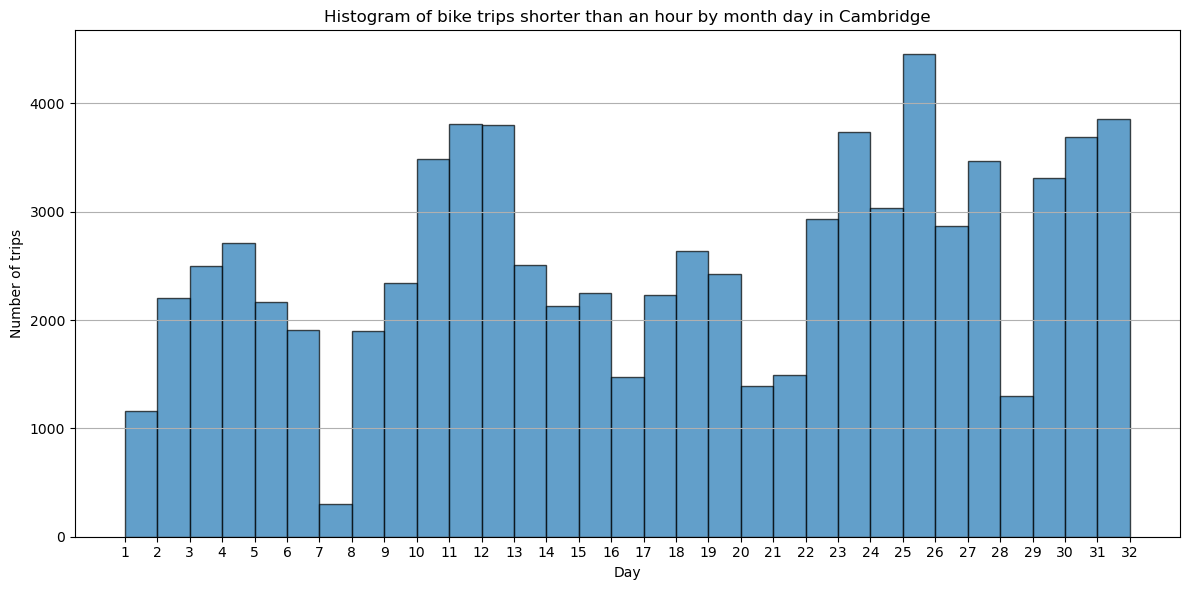

In [52]:
# Filter only trips that are on the same day
cambridge_df['end_day'] = pd.to_datetime(cambridge_df['ended_at']).dt.day
cambridge_df = cambridge_df[cambridge_df['start_day'] == cambridge_df['end_day']]


# Plot a histogram
plt.figure(figsize=(12, 6))
plt.hist(cambridge_df['start_day'], bins=range(1,33), edgecolor='black', alpha=0.7)
plt.title('Histogram of bike trips shorter than an hour by month day in Cambridge')
plt.xlabel('Day')
plt.ylabel('Number of trips')
plt.xticks(range(1,33))
plt.grid(axis='y')
plt.tight_layout()

plt.show()

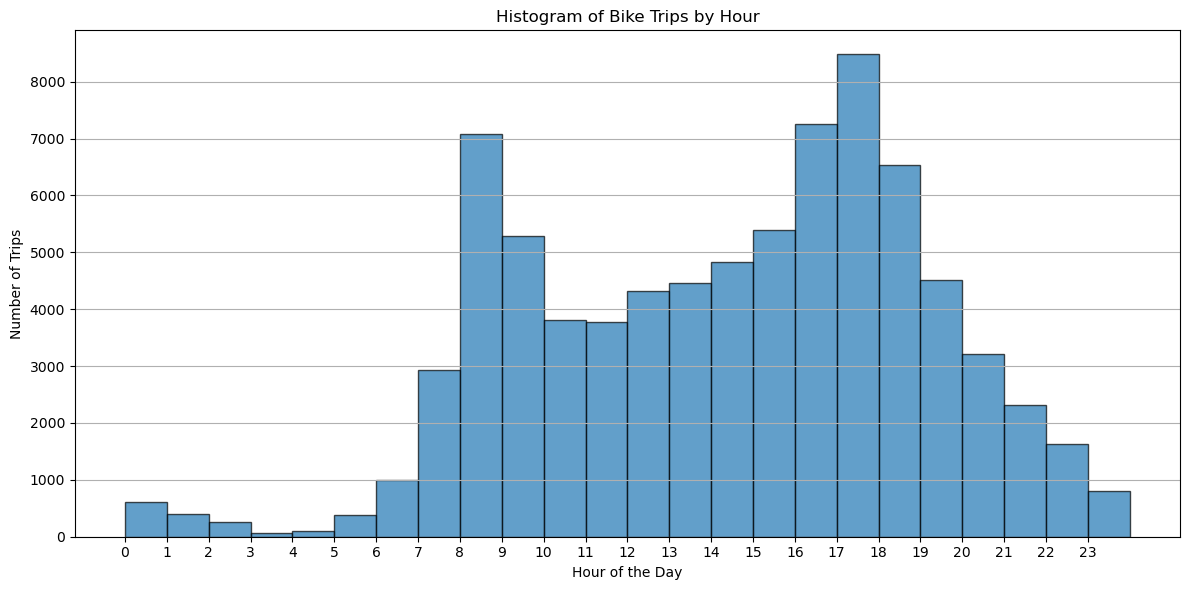

In [53]:
cambridge_short_trips_by_hour = pd.to_datetime(cambridge_df['started_at']).dt.hour

# Plot a histogram
plt.figure(figsize=(12, 6))
plt.hist(cambridge_short_trips_by_hour, bins=range(25), edgecolor='black', alpha=0.7)
plt.title('Histogram of Bike Trips by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid(axis='y')
plt.tight_layout()

plt.show()

##### Drop columns that aren't needed

In [54]:
cambridge_df.rename(columns= {'started_at': 'startTime', 'ended_at': 'endTime', 'start_lat': 'startLat', 'start_lng': 'startLng', 'end_lat': 'endLat', 'end_lng': 'endLng', 'duration_minutes': 'durationMin'}, inplace=True)
cambridge_df.drop(columns=['startLat', 'startLng', 'endLat', 'endLng', 'durationMin', 'member_casual', 'start_day', 'end_day', 'rideable_type', 'start_station_name', 'end_station_name'], inplace=True)
cambridge_df

,ride_id,startTime,endTime,start_station_id,end_station_id
0,D2F4A4783B230A84,2024-01-31 12:16:49,2024-01-31 12:21:02,M32037,M32011
1,D305CEFFD4558633,2024-01-12 08:14:16,2024-01-12 08:19:48,M32037,M32011
2,02009BB4EBA0D1F6,2024-01-29 15:00:05,2024-01-29 15:05:47,M32053,M32065
3,04C230C1C39071F7,2024-01-09 16:33:40,2024-01-09 17:00:41,M32037,K32005
6,F93AF0484FBA82B2,2024-01-23 12:50:25,2024-01-23 12:55:28,M32037,M32065
...,...,...,...,...,...
166671,26CF93B650671A0B,2024-01-12 21:23:01,2024-01-12 21:44:27,M32027,S32036
166682,CB3304F1AF5BCFD8,2024-01-08 20:03:18,2024-01-08 20:13:58,M32071,D32038
166684,BEF5DB2719508C93,2024-01-14 19:18:22,2024-01-14 19:30:29,M32027,S32036
166691,B2DD1A411393AB48,2024-01-23 17:08:17,2024-01-23 17:28:40,M32071,S32036


In [55]:
cambridge_df

,ride_id,startTime,endTime,start_station_id,end_station_id
0,D2F4A4783B230A84,2024-01-31 12:16:49,2024-01-31 12:21:02,M32037,M32011
1,D305CEFFD4558633,2024-01-12 08:14:16,2024-01-12 08:19:48,M32037,M32011
2,02009BB4EBA0D1F6,2024-01-29 15:00:05,2024-01-29 15:05:47,M32053,M32065
3,04C230C1C39071F7,2024-01-09 16:33:40,2024-01-09 17:00:41,M32037,K32005
6,F93AF0484FBA82B2,2024-01-23 12:50:25,2024-01-23 12:55:28,M32037,M32065
...,...,...,...,...,...
166671,26CF93B650671A0B,2024-01-12 21:23:01,2024-01-12 21:44:27,M32027,S32036
166682,CB3304F1AF5BCFD8,2024-01-08 20:03:18,2024-01-08 20:13:58,M32071,D32038
166684,BEF5DB2719508C93,2024-01-14 19:18:22,2024-01-14 19:30:29,M32027,S32036
166691,B2DD1A411393AB48,2024-01-23 17:08:17,2024-01-23 17:28:40,M32071,S32036


##### Split the data into start and end

In [56]:
cambridge_df_stations = pd.melt(cambridge_df, id_vars=['ride_id', 'startTime', 'endTime'], value_vars=['start_station_id', 'end_station_id'], var_name='type', value_name='stationID')
cambridge_df_stations

,ride_id,startTime,endTime,type,stationID
0,D2F4A4783B230A84,2024-01-31 12:16:49,2024-01-31 12:21:02,start_station_id,M32037
1,D305CEFFD4558633,2024-01-12 08:14:16,2024-01-12 08:19:48,start_station_id,M32037
2,02009BB4EBA0D1F6,2024-01-29 15:00:05,2024-01-29 15:05:47,start_station_id,M32053
3,04C230C1C39071F7,2024-01-09 16:33:40,2024-01-09 17:00:41,start_station_id,M32037
4,F93AF0484FBA82B2,2024-01-23 12:50:25,2024-01-23 12:55:28,start_station_id,M32037
...,...,...,...,...,...
158937,26CF93B650671A0B,2024-01-12 21:23:01,2024-01-12 21:44:27,end_station_id,S32036
158938,CB3304F1AF5BCFD8,2024-01-08 20:03:18,2024-01-08 20:13:58,end_station_id,D32038
158939,BEF5DB2719508C93,2024-01-14 19:18:22,2024-01-14 19:30:29,end_station_id,S32036
158940,B2DD1A411393AB48,2024-01-23 17:08:17,2024-01-23 17:28:40,end_station_id,S32036


In [58]:
cambridge_df_stations['time'] = np.where(cambridge_df_stations['type'] == 'start_station_id', cambridge_df_stations['startTime'], cambridge_df_stations['endTime'])
cambridge_df_stations

,ride_id,startTime,endTime,type,stationID,time
0,D2F4A4783B230A84,2024-01-31 12:16:49,2024-01-31 12:21:02,start_station_id,M32037,2024-01-31 12:16:49
1,D305CEFFD4558633,2024-01-12 08:14:16,2024-01-12 08:19:48,start_station_id,M32037,2024-01-12 08:14:16
2,02009BB4EBA0D1F6,2024-01-29 15:00:05,2024-01-29 15:05:47,start_station_id,M32053,2024-01-29 15:00:05
3,04C230C1C39071F7,2024-01-09 16:33:40,2024-01-09 17:00:41,start_station_id,M32037,2024-01-09 16:33:40
4,F93AF0484FBA82B2,2024-01-23 12:50:25,2024-01-23 12:55:28,start_station_id,M32037,2024-01-23 12:50:25
...,...,...,...,...,...,...
158937,26CF93B650671A0B,2024-01-12 21:23:01,2024-01-12 21:44:27,end_station_id,S32036,2024-01-12 21:44:27
158938,CB3304F1AF5BCFD8,2024-01-08 20:03:18,2024-01-08 20:13:58,end_station_id,D32038,2024-01-08 20:13:58
158939,BEF5DB2719508C93,2024-01-14 19:18:22,2024-01-14 19:30:29,end_station_id,S32036,2024-01-14 19:30:29
158940,B2DD1A411393AB48,2024-01-23 17:08:17,2024-01-23 17:28:40,end_station_id,S32036,2024-01-23 17:28:40


In [60]:
cambridge_df_stations.sort_values(by='time', inplace = True)
cambridge_df_stations

,ride_id,startTime,endTime,type,stationID,time
55710,686C9A74736CF602,2024-01-01 00:04:13,2024-01-01 00:25:31,start_station_id,F32003,2024-01-01 00:04:13
38498,C787468122A9D9F4,2024-01-01 00:05:08,2024-01-01 00:23:10,start_station_id,S32019,2024-01-01 00:05:08
50503,F0444357377C4589,2024-01-01 00:08:14,2024-01-01 00:16:30,start_station_id,M32016,2024-01-01 00:08:14
54702,6187563D05E7C7E5,2024-01-01 00:13:03,2024-01-01 00:18:40,start_station_id,M32012,2024-01-01 00:13:03
54703,4E7D38E9BD29BB51,2024-01-01 00:13:45,2024-01-01 00:18:39,start_station_id,M32012,2024-01-01 00:13:45
...,...,...,...,...,...,...
50446,DC874948ADE72118,2024-01-31 23:47:04,2024-01-31 23:57:14,start_station_id,M32012,2024-01-31 23:47:04
109352,92938642D0161235,2024-01-31 23:36:52,2024-01-31 23:48:56,end_station_id,M32083,2024-01-31 23:48:56
128531,A1032489AE3A7692,2024-01-31 23:30:29,2024-01-31 23:49:45,end_station_id,B32005,2024-01-31 23:49:45
84908,40B7689705717F87,2024-01-31 23:42:14,2024-01-31 23:50:21,end_station_id,M32029,2024-01-31 23:50:21


##### Sort values by start time

In [61]:
cambridge_df_stations.drop(columns=['startTime', 'endTime', 'ride_id'], inplace=True)
cambridge_df_stations

,type,stationID,time
55710,start_station_id,F32003,2024-01-01 00:04:13
38498,start_station_id,S32019,2024-01-01 00:05:08
50503,start_station_id,M32016,2024-01-01 00:08:14
54702,start_station_id,M32012,2024-01-01 00:13:03
54703,start_station_id,M32012,2024-01-01 00:13:45
...,...,...,...
50446,start_station_id,M32012,2024-01-31 23:47:04
109352,end_station_id,M32083,2024-01-31 23:48:56
128531,end_station_id,B32005,2024-01-31 23:49:45
84908,end_station_id,M32029,2024-01-31 23:50:21


In [62]:
cambridge_df_stations['type'] = np.where(cambridge_df_stations['type'] == 'start_station_id', 'start', 'end')
cambridge_df_stations

,type,stationID,time
55710,start,F32003,2024-01-01 00:04:13
38498,start,S32019,2024-01-01 00:05:08
50503,start,M32016,2024-01-01 00:08:14
54702,start,M32012,2024-01-01 00:13:03
54703,start,M32012,2024-01-01 00:13:45
...,...,...,...
50446,start,M32012,2024-01-31 23:47:04
109352,end,M32083,2024-01-31 23:48:56
128531,end,B32005,2024-01-31 23:49:45
84908,end,M32029,2024-01-31 23:50:21


##### Export station trip data

In [63]:
cambridge_df_stations.to_csv("202401-stationdata-cambridge.csv", index=False)